In [2]:
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

path = '/Users/tdobbins/Desktop/zbp.csv'
sample = pd.read_csv(path)

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sample.head()

,sq_miles,HC03_VC96,HC01_VC03,HC01_VC103,HC03_VC67,HC03_VC68,HC03_VC88,HC03_VC49,HC01_VC88,HC03_VC135,HC03_VC136,HC03_VC92,HC03_VC12,HC03_VC41,HC03_VC43,HC03_VC161,HC01_VC118,HC03_VC171,zip,grocery_stores,restaurants,manufacturing,tech,colleges,total,shopping_centers,new_homes,hotels,car_dealers,taxis,airport_related,starbucks_count,HC01_VC03_sqrt,num_of_sb,City,State,has_starbucks
0,4.439851,36.3,7013,1394,78.0,9.4,27.3,71.8,1677,1.3,27.3,14.0,9.8,34.4,19.6,11.3,56976,18.7,89109,156,1536,24,13,32,2556,15,18,90,9,6,2,25,83.743656,625,Las Vegas,NV,t
1,0.524270,56.9,10803,1562,87.6,8.0,11.9,73.9,668,1.7,20.6,24.5,6.1,61.3,19.8,10.7,62253,18.9,98101,228,1124,36,49,80,2919,22,12,162,3,3,4,23,103.937481,529,Seattle,WA,t
2,4.944263,53.2,35893,4647,81.4,11.3,10.9,75.4,7247,1.5,21.3,19.5,7.6,56.0,22.0,11.8,49269,24.3,92101,184,1828,8,22,208,3982,38,62,273,3,15,30,23,189.454480,529,San Diego,CA,t
3,0.327078,80.9,16278,2673,88.3,7.8,5.5,72.6,1120,1.5,31.9,36.9,3.6,69.7,22.9,5.3,104324,7.2,10017,260,1344,20,52,240,4963,104,34,582,3,6,11,20,127.585266,400,New York,NY,t
4,0.678290,70.6,38752,6111,88.6,5.3,9.7,72.5,6560,2.2,31.4,33.6,6.1,68.5,19.0,8.1,86447,11.8,10019,344,2192,24,35,232,4939,70,46,699,30,39,5,17,196.855277,289,New York,NY,t


In [4]:
sample.fillna(0, inplace=True)

In [5]:
sample.has_starbucks = sample.has_starbucks.replace('t', 1)
sample.has_starbucks = sample.has_starbucks.replace('f', 0)

In [6]:
#########################
# GLM model, results
#########################

admit_yn = sample.has_starbucks
score = sample.new_homes
# score = sample.GP5

score_with_intercept = sm.add_constant(score)

model = sm.GLM(admit_yn, score_with_intercept, family=sm.families.Binomial())
result = model.fit()

In [7]:
print result.summary()

DEBUG:root:Enter SimpleTable.data2rows.
DEBUG:root:Exit SimpleTable.data2rows.
DEBUG:root:Enter SimpleTable.data2rows.
DEBUG:root:Exit SimpleTable.data2rows.
DEBUG:root:Enter SimpleTable.data2rows.
DEBUG:root:Exit SimpleTable.data2rows.


                 Generalized Linear Model Regression Results                  
Dep. Variable:          has_starbucks   No. Observations:                32512
Model:                            GLM   Df Residuals:                    32510
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -10051.
Date:                Mon, 10 Apr 2017   Deviance:                       20103.
Time:                        19:42:58   Pearson chi2:                 4.89e+12
No. Iterations:                     9                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.9365      0.027   -109.136      0.000        -2.989    -2.884
new_homes      0.0946      0.001     73.499      0.0

In [8]:
import pylab as plt
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import statsmodels.api as sm
import re
from scipy import stats
from utilitybelt import UtilityBelt as ub
from tabulate import tabulate
from fpdf import FPDF
import os
from PyPDF2 import PdfFileReader, PdfFileMerger

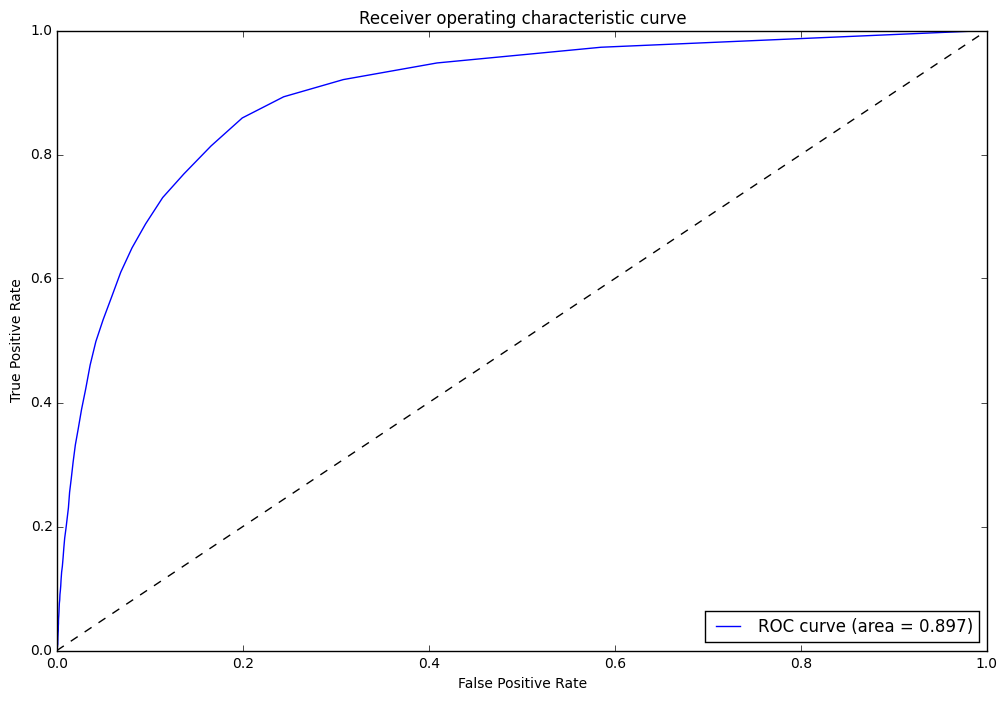

In [9]:
admit_array = np.asarray(admit_yn)
pred = np.asarray(score)

# retrieve false-positive rates and true-positive rates
fpr, tpr, thresholds = metrics.roc_curve(admit_array, pred, pos_label=1)
metrics.auc(fpr, tpr)

#compute area under curve 
roc_auc = auc(fpr, tpr)

# plotting the ROC curve
roc_curve = plt.figure(figsize=(12,8))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)

# dashed line through the origin
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")

In [47]:
predict = sample[['new_homes','hotels','HC03_VC88', 'HC03_VC96', 'shopping_centers', 'has_starbucks', 'predict', 'zip']]

In [48]:
logit = sm.Logit(sample['has_starbucks'], sample[['new_homes','hotels','HC03_VC88','shopping_centers']])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.246812
         Iterations 7


In [49]:
print result.summary()

DEBUG:root:Enter SimpleTable.data2rows.
DEBUG:root:Exit SimpleTable.data2rows.
DEBUG:root:Enter SimpleTable.data2rows.
DEBUG:root:Exit SimpleTable.data2rows.
DEBUG:root:Enter SimpleTable.data2rows.
DEBUG:root:Exit SimpleTable.data2rows.


                           Logit Regression Results                           
Dep. Variable:          has_starbucks   No. Observations:                32512
Model:                          Logit   Df Residuals:                    32508
Method:                           MLE   Df Model:                            3
Date:                Mon, 10 Apr 2017   Pseudo R-squ.:                  0.4537
Time:                        19:48:25   Log-Likelihood:                -8024.3
converged:                       True   LL-Null:                       -14689.
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
new_homes            0.0391      0.001     27.997      0.000         0.036     0.042
hotels               0.0393      0.002     22.752      0.000         0.036     0.043
HC03_VC88           -0.1020 

In [54]:
sample['predict'] = result.predict(sample[['new_homes','hotels','HC03_VC88','shopping_centers']])

In [55]:
predict[(predict.has_starbucks==0)&(predict.predict>0.55)].sort_values(['predict'], ascending=[0])

,new_homes,hotels,HC03_VC88,HC03_VC96,shopping_centers,has_starbucks,predict,zip
7713,158,870,34.0,16.2,16,0,1.000000,11219
8011,146,594,24.4,37.0,16,0,1.000000,11230
8394,138,516,19.4,43.3,24,0,1.000000,11211
7641,184,354,22.1,40.4,8,0,1.000000,11218
8579,128,261,21.6,39.9,43,0,1.000000,11101
7241,30,444,28.3,12.1,11,0,1.000000,10458
8267,102,309,29.4,36.3,16,0,1.000000,11229
8341,32,402,29.3,18.6,5,0,0.999999,10467
6809,24,381,20.9,30.3,3,0,0.999999,10031
7530,34,357,32.4,22.7,4,0,0.999996,11226
